# **Pollution Level Prediction Using Naive Bayes**

## Objective

To **predict the likelihood of air quality** based on various factors like temperature, humidity, pollution levels (PM2.5, PM10, NO2, SO2, CO), proximity to industrial areas, and population density using predictive models.

## Dataset Overview

| Attribute | Description |
| :--- | :--- |
| **Temperature** | The air temperature in degrees Celsius. |
| **Humidity** | The percentage of water vapor in the air. |
| **PM2.5** | The concentration of particulate matter with a diameter of 2.5 µm. |
| **PM10** | The concentration of particulate matter with a diameter of 10 µm. |
| **NO2** | Nitrogen dioxide concentration in the air ($\mu g/m^3$). |
| **SO2** | Sulfur dioxide concentration in the air ($\mu g/m^3$). |
| **CO** | Carbon monoxide concentration in the air ($\mu g/m^3$). |
| **Proximity_to_Industrial_Areas** | The distance to industrial areas in kilometers. |
| **Population_Density** | The number of people per square kilometer. |
| **Air_Quality** | The overall air quality level: Good, Moderate, Poor, Hazardous. (Target variable) |

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/iamnaveen1401/Datasets/refs/heads/main/pollution_dataset.csv")
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [4]:
df['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [5]:
# Feature Selection
X = df.drop(columns='Air Quality')
y = df['Air Quality']

In [6]:
# Split the Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Gaussian Naive Bayes 
**Features are continous normal distribution**

In [7]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model.score(X_test,y_test)

0.9226666666666666

**Compair with Decision Tree**

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)
dt_model.score(X_test,y_test)

0.8953333333333333

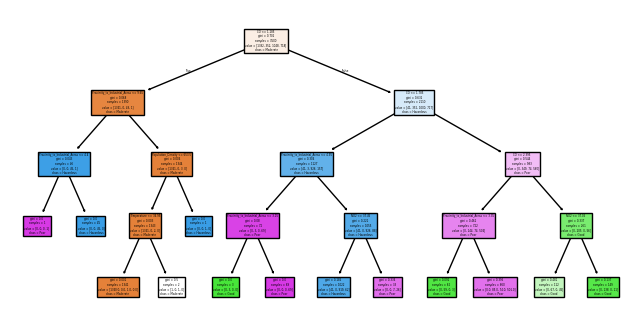

In [9]:
plt.figure(figsize=(8,4))
plot_tree(dt_model, feature_names=X.columns,filled=True, class_names=['Moderate', 'Good', 'Hazardous', 'Poor'])
plt.show()